In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pandas as pd

seaborn.set(style = 'darkgrid')
# seaborn.set_style("whitegrid")
title_size = 20
lable_size = 18
titel_pad = 10
alpha = 0.2

In [3]:
def read_multi_files(folder_path, require_suffix=None, suffix = '', column='Test Success Rate'): # Test Returns Mean
    min_len = 1500

    files = os.listdir(folder_path+suffix)
    reward_data = []
    tmp = []

    for file in files:
        file_path = folder_path + suffix + '/' + file + '/progress.csv'
        print('reading from '+ file_path)
        df = pd.read_csv(file_path)
        min_len = min(min_len, len(df))
        tmp.append(df[column])

    for data in tmp:
        reward_data.append(data[:min_len])

    return reward_data

def MA(value, step):
    ma_value = []
    for i in range(len(value)):
        if step > 1:
            if i < 5:
                tmp = value[i:i+int(step/1.5)]
            elif 5 <= i < 10:
                tmp = value[i:i + int(step/1.3)]
            elif 10 <= i < 15:
                tmp = value[i:i + int(step / 1.1)]
            else:
                tmp = value[i:i + step]
        else:
            tmp = [value[i]]
        if len(tmp) > 0:
            ma_value.append(sum(tmp) / len(tmp))
        else:
            ma_value.append(tmp[0])
    return np.array(ma_value)


r_means = lambda x: np.nanmean(x, axis=1)
r_stderrs = lambda x: np.nanstd(x, axis=1) /  np.sqrt(np.count_nonzero(x, axis=1))
r_mins = lambda x: r_means(x) - r_stderrs(x)  # np.nanmin(x, axis=1)
r_maxs = lambda x: r_means(x) + r_stderrs(x)  # np.nanmax(x, axis=1)

reading from logs/basic-retrieval-embedlr-0.001-embeddim-16-fstep-5/basic_retrieval-embedlr_0.001-embeddim_16-fstep_5_2022_09_18_15_44_02_0000--s-0/progress.csv
logs/basic-retrieval-embedlr-0.001-embeddim-16-fstep-5 (100, 1)
reading from logs/basic-retrieval-embedlr-0.001-embeddim-32-fstep-5/basic_retrieval-embedlr_0.001-embeddim_32-fstep_5_2022_09_18_15_44_02_0001--s-0/progress.csv
logs/basic-retrieval-embedlr-0.001-embeddim-32-fstep-5 (100, 1)
reading from logs/basic-retrieval-embedlr-0.001-embeddim-64-fstep-5/basic_retrieval-embedlr_0.001-embeddim_64-fstep_5_2022_09_18_15_33_44_0000--s-0/progress.csv
logs/basic-retrieval-embedlr-0.001-embeddim-64-fstep-5 (100, 1)
reading from logs/basic-retrieval-embedlr-0.001-embeddim-128-fstep-5/basic_retrieval-embedlr_0.001-embeddim_128-fstep_5_2022_09_18_15_33_44_0001--s-0/progress.csv
logs/basic-retrieval-embedlr-0.001-embeddim-128-fstep-5 (100, 1)
reading from logs/basic-retrieval-embedlr-0.001-embeddim-16-fstep-10/basic_retrieval-embedlr_0.00

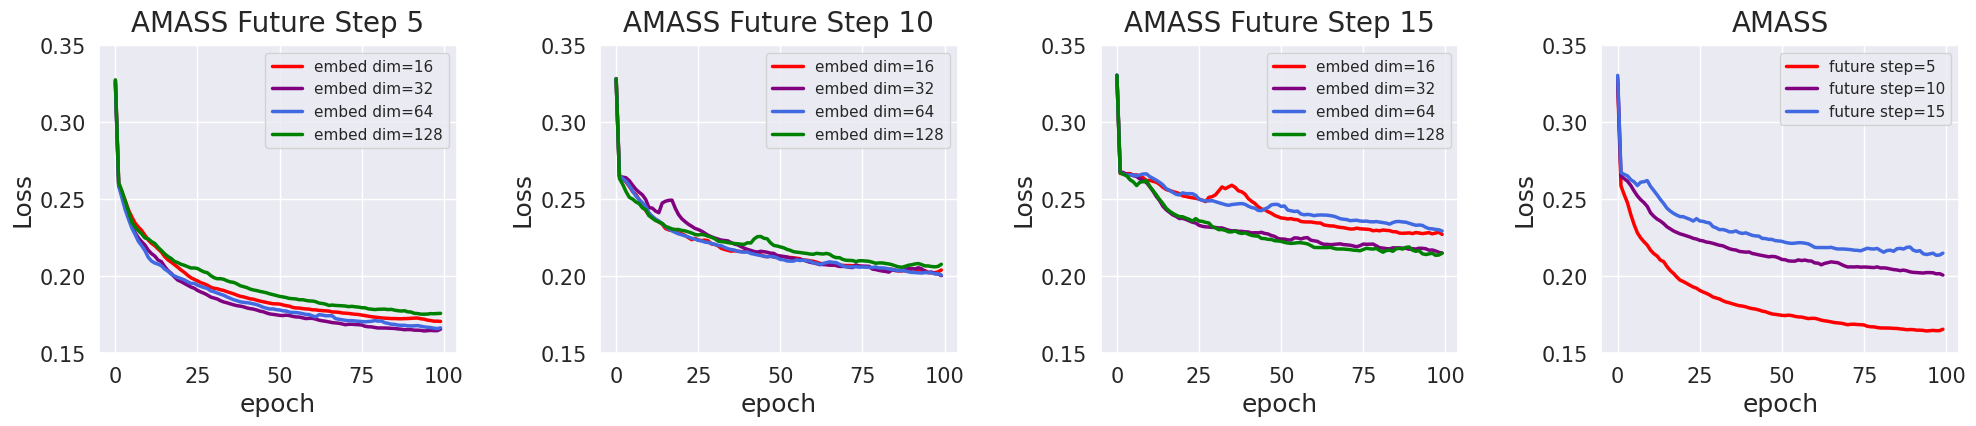

In [4]:
title_size = 20
lable_size = 18
ticksize = 15
num_method = 2
line_width = 2.5

colors = ['red', 'purple', 'royalblue', 'green', 'orchid', 'darkorange', 'darkcyan']

plt.rcParams['xtick.labelsize'] = ticksize
plt.rcParams['ytick.labelsize'] = ticksize

plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

fig, ax = plt.subplots(1, 4, figsize=(24, 4))
plt.subplots_adjust(hspace=0.3, wspace=0.4)

methods = ["embed dim=16", "embed dim=32", "embed dim=64", "embed dim=128"]

# AMASS Dataset, Future Step 5
env = 'amass'
window_length = 5
require_suffix = None
for i in range(len(methods)):
    name = "basic-retrieval-embedlr-0.001-embeddim-{}-fstep-5".format(
        methods[i].split("=")[-1]
    )

    returns = read_multi_files('logs/' + name, require_suffix, column="Eval Embed Loss")
    returns = np.array(returns).T
    print('logs/' + name, returns.shape)
    x = np.arange(returns.shape[0])
    y1 = r_mins(returns)
    y2 = r_maxs(returns)
    ma_y1 = MA(y1, window_length)
    ma_y2 = MA(y2, window_length)
    ax[0].fill_between(x, ma_y1, ma_y2, where=ma_y2 >= ma_y1, facecolor=colors[i], interpolate=True, alpha=alpha)
    ax[0].plot(x, MA(r_means(returns), window_length), color=colors[i], linewidth=line_width, label=methods[i])

ax[0].set_title('AMASS Future Step 5', fontsize=title_size, pad=titel_pad)
ax[0].set_xlabel('epoch', fontsize=lable_size)
ax[0].set_ylabel('Loss', fontsize=lable_size)
ax[0].set_ylim(bottom=0.15, top=0.35)
ax[0].legend()

# AMASS Dataset, Future Step 10
env = 'amass'
window_length = 5
require_suffix = None
for i in range(len(methods)):
    name = "basic-retrieval-embedlr-0.001-embeddim-{}-fstep-10".format(
        methods[i].split("=")[-1]
    )

    returns = read_multi_files('logs/' + name, require_suffix, column="Eval Embed Loss")
    returns = np.array(returns).T
    print('logs/' + name, returns.shape)
    x = np.arange(returns.shape[0])
    y1 = r_mins(returns)
    y2 = r_maxs(returns)
    ma_y1 = MA(y1, window_length)
    ma_y2 = MA(y2, window_length)
    ax[1].fill_between(x, ma_y1, ma_y2, where=ma_y2 >= ma_y1, facecolor=colors[i], interpolate=True, alpha=alpha)
    ax[1].plot(x, MA(r_means(returns), window_length), color=colors[i], linewidth=line_width, label=methods[i])

ax[1].set_title('AMASS Future Step 10', fontsize=title_size, pad=titel_pad)
ax[1].set_xlabel('epoch', fontsize=lable_size)
ax[1].set_ylabel('Loss', fontsize=lable_size)
ax[1].set_ylim(bottom=0.15, top=0.35)
ax[1].legend()

# AMASS Dataset, Future Step 15
env = 'amass'
window_length = 5
require_suffix = None
for i in range(len(methods)):
    name = "basic-retrieval-embedlr-0.001-embeddim-{}-fstep-15".format(
        methods[i].split("=")[-1]
    )

    returns = read_multi_files('logs/' + name, require_suffix, column="Eval Embed Loss")
    returns = np.array(returns).T
    print('logs/' + name, returns.shape)
    x = np.arange(returns.shape[0])
    y1 = r_mins(returns)
    y2 = r_maxs(returns)
    ma_y1 = MA(y1, window_length)
    ma_y2 = MA(y2, window_length)
    ax[2].fill_between(x, ma_y1, ma_y2, where=ma_y2 >= ma_y1, facecolor=colors[i], interpolate=True, alpha=alpha)
    ax[2].plot(x, MA(r_means(returns), window_length), color=colors[i], linewidth=line_width, label=methods[i])

ax[2].set_title('AMASS Future Step 15', fontsize=title_size, pad=titel_pad)
ax[2].set_xlabel('epoch', fontsize=lable_size)
ax[2].set_ylabel('Loss', fontsize=lable_size)
ax[2].set_ylim(bottom=0.15, top=0.35)
ax[2].legend()

methods = ["future step=5", "future step=10", "future step=15"]
# AMASS Dataset, Best of each future steps
env = 'amass'
window_length = 5
require_suffix = None
for i in range(len(methods)):
    if i == 0:
        name = "basic-retrieval-embedlr-0.001-embeddim-32-fstep-5"
    elif i == 1:
        name = "basic-retrieval-embedlr-0.001-embeddim-64-fstep-10"
    elif i == 2:
        name = "basic-retrieval-embedlr-0.001-embeddim-128-fstep-15"

    returns = read_multi_files('logs/' + name, require_suffix, column="Eval Embed Loss")
    returns = np.array(returns).T
    print('logs/' + name, returns.shape)
    x = np.arange(returns.shape[0])
    y1 = r_mins(returns)
    y2 = r_maxs(returns)
    ma_y1 = MA(y1, window_length)
    ma_y2 = MA(y2, window_length)
    ax[3].fill_between(x, ma_y1, ma_y2, where=ma_y2 >= ma_y1, facecolor=colors[i], interpolate=True, alpha=alpha)
    ax[3].plot(x, MA(r_means(returns), window_length), color=colors[i], linewidth=line_width, label=methods[i])

ax[3].set_title('AMASS', fontsize=title_size, pad=titel_pad)
ax[3].set_xlabel('epoch', fontsize=lable_size)
ax[3].set_ylabel('Loss', fontsize=lable_size)
ax[3].set_ylim(bottom=0.15, top=0.35)
ax[3].legend()
plt.savefig("amass_embed_loss.pdf", dpi=300)